# K Nearest Neighbor 

### 1. KNN Theory

#### 1.1 Type of algorithm

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h: X\rightarrow Y$ so that given an unseen observation $x$, $h(x)$ can confidently predict the corresponding output $y$.


#### 1.2 Distance measure

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let $x_{i}$ be an input sample with $p$ features $(x_{i1}, x_{i2},..., x_{ip})$, $n$ be the total number of input samples $(i=1,2,...,n)$.  The Euclidean distance between sample $x_{i}$ and $x_{l}$ is is defined as: 


$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

#### 1.3 Algorithm steps

STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

### 2. Importing and preperation of data

#### 2.1 Import libraries

In [1]:
import numpy as np
import pandas as pd

#### 2.2 Load dataset

NOTE: Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [4]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\vansh\Desktop\PC\ML\CareerEra\ML\data\Iris.csv')

In [7]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataset.shape

(150, 6)

In [8]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### 2.3 Summarize the Dataset

In [ ]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

In [9]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
dataset['SepalLengthCm'].iloc[0:5]=np.nan
dataset['PetalLengthCm'].iloc[0:5]=np.nan

C:\Users\vansh\AppData\Local\Temp\ipykernel_15980\3587867291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SepalLengthCm'].iloc[0:5]=np.nan
C:\Users\vansh\AppData\Local\Temp\ipykernel_15980\3587867291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PetalLengthCm'].iloc[0:5]=np.nan


In [9]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
dataset['SepalLengthCm']=dataset['SepalLengthCm'].fillna(dataset['SepalLengthCm'].mean())
dataset['PetalLengthCm']=dataset['PetalLengthCm'].fillna(dataset['PetalLengthCm'].mean())

In [16]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
# dataset.groupby('Species').size()

dataset['Species'].value_counts()


#### 2.4 Dividing data into features and labels

NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [20]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values

y = dataset['Species'].values

In [ ]:




# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [ ]:
y[:10]

#### 2.5 Label encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])


labelEncoder().fit(df["Sex")]
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [4]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [5]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
y = LabelEncoder().fit_transform(y)
# dataset.head()

In [14]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
dataset2=dataset.copy()


In [30]:
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# dataset2.Species = dataset2.Species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [31]:
dataset2["Species"]=dataset2['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [32]:
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
dataset.describe()

In [53]:
from sklearn.preprocessing import MinMaxScaler


In [54]:
features = dataset[dataset.columns[1:5]]

In [55]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
scaled_features = MinMaxScaler().fit_transform(features)

In [57]:
scaled_features

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 2.6 Spliting dataset into training set and test set

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [59]:
100


18: Tr:0-70, Te:71-100
    
28: Tr:0-10,50-100, Te: 11-49

SyntaxError: illegal target for annotation (2053210425.py, line 4)

In [23]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other sercostamses it is extremly important to apply feature scaling before running classification algorythms.

### 3. Data Visualization

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 3.4. Boxplots

<Figure size 640x480 with 0 Axes>

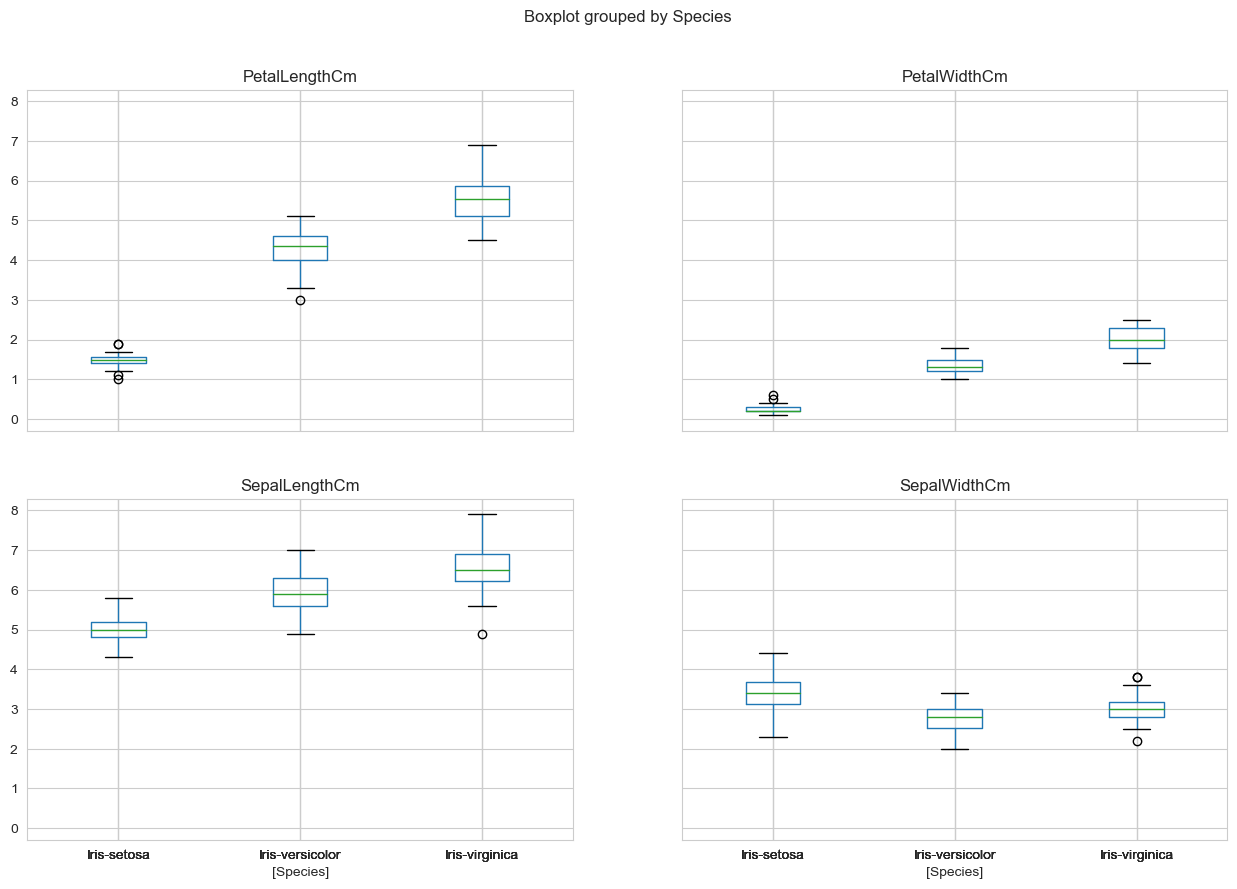

In [63]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

### 4. Using KNN for classification

#### 4.1. Making predictions

In [25]:

from sklearn.neighbors import KNeighborsClassifier



# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.model_selection import cross_val_score

In [44]:
# Fitting the model
model=KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)

In [45]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [51]:
pwd

'C:\\Users\\vansh\\Desktop\\PC\\ML\\CareerEra\\ML'

In [54]:
import joblib

joblib.dump(model, r"C:\Users\vansh\Desktop\PC\ML\Sunstone\knn_iris.pkl")

['C:\\Users\\vansh\\Desktop\\PC\\ML\\Sunstone\\knn_iris.pkl']

In [55]:
load_model =  joblib.load(r"C:\Users\vansh\Desktop\PC\ML\Sunstone\knn_iris.pkl")

In [46]:
X_test.shape
# X_test[:5]

(45, 4)

In [47]:
y_pred

array([2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2])

In [48]:
# import joblib

# # Save the model as a pickle file
# model_details = './models/iris_knn_model.pkl'

# joblib.dump(model, model_details)

#### 4.2. Evaluating predictions

Calculating model accuracy:

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100

# accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 1)) + ' %.')

Accuracy of our model is equal 95.6 %.


In [50]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
x_new=np.array([[5.1,3.5,1.4,0.2]])

In [73]:
model.predict(x_new)

array([2])

#### 4.3. Using cross-validation for parameter tuning:

In [107]:
k_list = list(range(1,50,2))

In [108]:
k_list

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
# creating list of K for KNN
k_list = list(range(1,50,2))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

In [111]:
scores

array([0.86666667, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [79]:
cv_scores

[0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.96,
 0.9600000000000002,
 0.9533333333333334,
 0.96,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.9466666666666667,
 0.9400000000000001,
 0.9333333333333333,
 0.9400000000000001,
 0.9266666666666667,
 0.9266666666666667]

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns 

In [112]:
# changing to misclassification error
MSE = [round(1 - x, 3) for x in cv_scores]
print(MSE)

[0.04, 0.033, 0.033, 0.033, 0.027, 0.033, 0.02, 0.027, 0.027, 0.027, 0.033, 0.027, 0.033, 0.033, 0.047, 0.053, 0.053, 0.053, 0.053, 0.047, 0.047, 0.053, 0.067, 0.067, 0.06]


<Figure size 640x480 with 0 Axes>

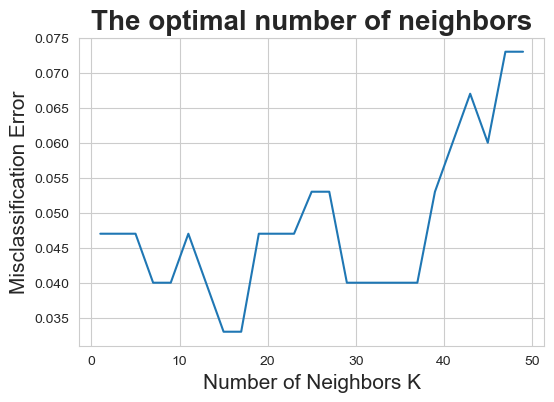

In [82]:
plt.figure()
plt.figure(figsize=(6,4))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [115]:
MSE

[0.04,
 0.033,
 0.033,
 0.033,
 0.027,
 0.033,
 0.02,
 0.027,
 0.027,
 0.027,
 0.033,
 0.027,
 0.033,
 0.033,
 0.047,
 0.053,
 0.053,
 0.053,
 0.053,
 0.047,
 0.047,
 0.053,
 0.067,
 0.067,
 0.06]

In [116]:
x=min(MSE)

In [117]:
x

0.02

In [118]:
MSE.index(x)

6

In [119]:
k_list[6]

13

In [120]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [90]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[15  0  0]
 [ 0 13  0]
 [ 0  0 17]]


In [91]:
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

